# Code for analyzing predictions

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import os

from scipy import stats
import collections
 
import tensorflow as tf
import h5py
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import os
import pybedtools
import torch
import h5sparse
import datetime
import logging

from scipy import stats

import sys
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels

from pylab import rcParams

In [178]:
# required files
feature_path = "/home/eecs/akmorrow/epitome/data/feature_name"

predictions_path = "/home/eecs/akmorrow/epitome/out/Epitome/processed_datasets/TiPS_df.tsv"

conditions_file = "/home/eecs/akmorrow/epitome/out/Epitome/processed_datasets/joinedConditions.tab"

In [7]:
from epitome.functions import *
from epitome.constants import *

# Differential Binding Analysis

In [8]:
matrix, cellmap, assaymap = get_assays_from_feature_file(feature_path=feature_path, 
                                  eligible_assays = None,
                                  eligible_cells = None, min_cells_per_assay = 2, min_assays_per_cell=5)

In [156]:
means = pd.read_csv(predictions_path, sep="\t")


In [219]:
cols = ['Unnamed: 0', 'File', 'p300', 'c-Myc', 'c-Jun', 'c-Fos', 'Znf143',
       'ZZZ3', 'ZNF274', 'ZBTB7A', 'ZBTB33', 'YY1', 'USF2', 'USF-1', 'TR4',
       'TFIIIC-110', 'TEAD4', 'TCF7L2', 'TCF12', 'TBP', 'TBLR1', 'TAF7',
       'TAF1', 'Sin3Ak-20', 'STAT5A', 'STAT3', 'STAT1', 'SRF', 'SP2', 'SP1',
       'SMC3', 'SIX5', 'SIN3A', 'Rad21', 'RXRA', 'RPC155', 'RFX5', 'RBBP5',
       'Pol3', 'Pol2-4H8', 'Pol2(phosphoS2)', 'Pol2(b)', 'Pol2', 'PU.1',
       'POU2F2', 'PML', 'PAX5-C20', 'Nrf1', 'NRSF', 'NFKB', 'NFIC', 'NF-YB',
       'NF-YA', 'NF-E2', 'Mxi1', 'Max', 'MafK', 'MafF', 'MEF2A', 'MAZ', 'JunD',
       'Ini1', 'IRF3', 'HDAC2', 'HA-E2F1', 'GTF2F1', 'GATA3', 'GATA-2', 'GABP',
       'FOXA1', 'FOSL2', 'FOSL1', 'Egr-1', 'EZH2', 'ETS1', 'ELK1', 'ELF1',
       'E2F6', 'E2F4', 'CTCF', 'COREST', 'CHD2', 'CHD1', 'CEBPB', 'Brg1',
       'Bach1', 'BRF2', 'BRF1', 'BRCA1', 'BHLHE40', 'BDP1', 'BCLAF1', 'BCL3',
       'BCL11A', 'ATF3', 'ATF2', 'ARID3A']

cols = list(map(lambda x: re.sub('-|\(|\)|\.', '', x), cols))
means.columns = cols

In [235]:
# load and parse conditions
conditions = pd.read_csv(conditions_file,  delimiter=r"\s+")
conditions.index = list(map(lambda x: re.sub('ATAC_|atac__|__0\.001', '', x), conditions.index))
conditions["Type"] = conditions["Type"].astype('category')
conditions["Type_cat"] = conditions["Type"].cat.codes

conditions["Donor"] = conditions["Donor"].astype('category')
conditions["Donor_cat"] = conditions["Donor"].cat.codes

In [ ]:
means = pd.read_csv(predictions_path, sep="\t")
t1 = map(lambda x: x.split("_peaks.bed")[0], means["File"])
means.index = list(map(lambda x: re.sub('ATAC_|atac__|__0\.001', '', x), t1))


In [193]:
matrix = means.as_matrix(columns = means.columns.drop(['Unnamed: 0','File', 'Sample']))

/data/akmorrow/miniconda3/envs/EpitomeEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


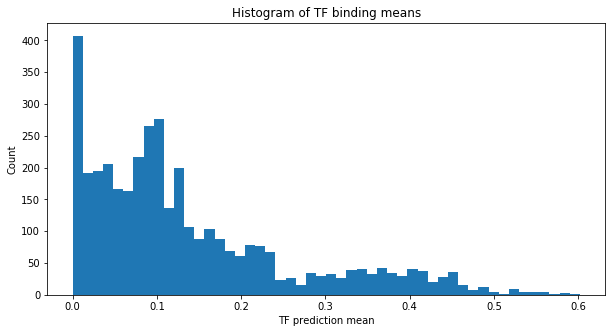

In [36]:

rcParams['figure.figsize'] = 10, 5

plt.hist(matrix.flatten(), bins=50)  # arguments are passed to np.histogram
plt.title("Histogram of TF binding means")
plt.xlabel("TF prediction mean")
plt.ylabel("Count")
plt.show()

In [237]:
x_ij.as_matrix()

/data/akmorrow/miniconda3/envs/EpitomeEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 1.,  1.,  8.],
       [ 1.,  1.,  8.],
       [ 1.,  1.,  9.],
       [ 1.,  1.,  9.],
       [ 1.,  1., 10.],
       [ 1.,  1., 10.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  4., 11.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  4.],
       [ 1.,  3.,  4.],
       [ 1.,  2.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  2.,  5.],
       [ 1.,  3.,  5.],
       [ 1.,  3.,  5.],
       [ 1.,  2.,  3.],
       [ 1.,  3.,  3.],
       [ 1.,  3.,  3.],
       [ 1.,  2.,  6.],
       [ 1.,  3.,  6.],
       [ 1.,  3.,  6.],
       [ 1.,  2.,  7.],
       [ 1.,  3.,  7.],
       [ 1.,  3.,  7.]])

In [240]:
# anova test
df = means.join(conditions)

x_ij = df[["Type_cat", "Donor_cat"]]
x_ij = sm.add_constant(x_ij)

factors = means.columns.drop(['Unnamed: 0','File'])



df_filtered = df[(df["Type"] == "FBiPSC") | (df["Type"] == "TiPSC")]

for i in range(matrix.shape[1]):
    
    print(factors[i])

    # TODO cant use gamma output into anova
#     # Instantiate a gamma family model with the default link function.
#     gamma_model = sm.GLM(matrix[:,i], x_ij, family=sm.families.Gamma())

#     model = gamma_model.fit()
#     print(model)

#     print(model.summary())

    formula = '%s ~ C(Type) + C(Donor)' % factors[i]
    print(formula)
    model = ols(formula, df).fit() # TODO, not ols!
    aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
    print(aov_table)

p300
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   40
Model:                            GLM   Df Residuals:                       37
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                      0.00077726
Method:                          IRLS   Log-Likelihood:                 145.98
Date:                Thu, 04 Apr 2019   Deviance:                     0.029312
Time:                        13:23:44   Pearson chi2:                   0.0288
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6095      0.062     73.922      0.000       4.487       4.732
Type_cat      -0.1136      0.020     -5.669    

/data/akmorrow/miniconda3/envs/EpitomeEnv/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


AttributeError: 'PandasData' object has no attribute 'design_info'

In [222]:
test_data = sm.datasets.scotland.load()

data.exog = sm.add_constant(test_data.exog)

# Instantiate a gamma family model with the default link function.

gamma_model = sm.GLM(test_data.endog, test_data.exog, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(type(gamma_results))

<class 'statsmodels.genmod.generalized_linear_model.GLMResultsWrapper'>


/data/akmorrow/miniconda3/envs/EpitomeEnv/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
